In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('house_price_bd.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [5]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [37]:
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('house_price_bd.csv')

In [3]:
df.shape

(3865, 9)

There are **3865** rows (House Informations)

In [4]:
df['Location'].str.split(',').str.get(1).nunique()

106

 There are **106** unique locations

In [5]:
df['location_area'] = df['Location'].str.split(',').str.get(1).str.lower()

# Location
Replacing   
(1)The (r-a) from basundhara r-a  
(2) The ward numbers from specific wards, such as "9 no. pahartoli ward" becomes only pahartoli ward  
(3) And removing the whitespaces using str.strip()    

In [6]:
df['location_area'] = df['location_area'].str.replace('r-a','').str.replace(r'\b\d+\s*no\.?\s*','',regex=True,flags=re.IGNORECASE).str.strip()

# Price_in_taka
(1) Removing the ৳ from prices   
(2) convert the values in Crores  
(3) rounding up the values to 2

In [7]:
def convert_to_crores(x):
    converted = (x/10000000)
    return converted

In [8]:
df['Price_in_Cr'] = df['Price_in_taka'].str.replace('৳','').str.replace(',','').str.strip().astype(float).apply(lambda x:convert_to_crores(x)).round(2)

In [9]:
df.drop(['Price_in_taka'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Location          3859 non-null   object 
 8   location_area     3828 non-null   object 
 9   Price_in_Cr       3865 non-null   float64
dtypes: float64(4), object(6)
memory usage: 302.1+ KB


# City
Replacing the "-city" word from narayanganj  
There are **5** cities 

In [11]:
df['City'] = df['City'].str.replace('-city','').str.strip()

In [12]:
df['City'].value_counts()

City
dhaka          1650
chattogram     1470
narayanganj     420
gazipur         180
cumilla         145
Name: count, dtype: int64

# Floor_no

In [15]:
df['Floor_no'].value_counts()

Floor_no
1                       532
4                       418
5                       402
2                       397
3                       366
6                       316
7                       252
8                       228
9                       167
10                       30
11                       26
12                       19
13                        8
14                        2
4th to 8th Backside       2
8th                       2
1st                       1
G+7                       1
0+7                       1
A1,A2,A3,A4,A5,A6,A7      1
1F                        1
18                        1
5th                       1
17                        1
Name: count, dtype: int64

In [13]:
df['Floor_no'].str.strip()

0       3
1       1
2       6
3       4
4       4
       ..
3860    8
3861    7
3862    9
3863    9
3864    8
Name: Floor_no, Length: 3865, dtype: object

Droping where floor_no = "Merin City - Purbach" because they seems to like outliers

In [14]:
df = df[~df['Floor_no'].str.contains('Merin City - Purbach',na=False)]

Removing all the problematic rows with isin() function

In [27]:
rare_floor = df['Floor_no'].value_counts()[df['Floor_no'].value_counts()<=2].index

In [31]:
df = df[~df['Floor_no'].isin(rare_floor)]

In [32]:
df['Floor_no'].value_counts()

Floor_no
1     532
4     418
5     402
2     397
3     366
6     316
7     252
8     228
9     167
10     30
11     26
12     19
13      8
Name: count, dtype: int64

# Occupancy_status
This is the most useless column , might drop it

In [43]:
df['Occupancy_status'].value_counts()

Occupancy_status
vacant      3743
occupied       3
Name: count, dtype: int64

# Bedrooms

In [44]:
df['Bedrooms'].value_counts()

Bedrooms
3.0     2184
2.0      405
4.0      219
7.0        8
16.0       5
5.0        5
8.0        4
1.0        3
6.0        3
18.0       2
33.0       2
22.0       2
50.0       2
23.0       2
21.0       2
13.0       1
20.0       1
27.0       1
15.0       1
Name: count, dtype: int64

# Bathrooms

In [45]:
df['Bathrooms'].value_counts()

Bathrooms
3.0     1758
2.0      651
4.0      323
5.0       65
1.0       22
10.0      21
8.0        8
6.0        4
Name: count, dtype: int64

In [47]:
df.sample(3)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Location,location_area,Price_in_Cr
1682,This 1616 Sq Ft Apartment Is Up For For Sale I...,3.0,3.0,6,vacant,1616.0,chattogram,"CDA Avenue, Muradpur",muradpur,1.15
2065,A Convenient 1253 Sq Ft Residential Flat Is Pr...,3.0,3.0,7,vacant,1253.0,chattogram,"Dewan Bazar, Bakalia",bakalia,0.56
1382,Nearly Finished 1600 Square Feet Apartment For...,3.0,3.0,8,vacant,1600.0,dhaka,"Sector 15, Uttara",uttara,1.60


In [48]:
df.to_csv('house_price_cleaned.csv',index=False)

In [17]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [18]:
df = pd.read_csv('house_price_cleaned.csv')

Creating new boolean features that contains specific words   
for commercial space otherwise residential space  

In [19]:
df['is_commercial'] = df['Title'].str.contains('office|shop|commercial',case=False,na=False).astype(float)

In [20]:
df['is_commercial'].value_counts()

is_commercial
0.0    3408
1.0     437
Name: count, dtype: int64

In [21]:
df['is_residential'] = df['is_commercial'] == 0

In [22]:
df['is_residential'] = df['is_residential'].astype(float)

In [23]:
df = df[~df['Title'].str.contains('plot|building',case=False,na=False)]

# New Column 
## price per sqft

In [24]:
df['Price_per_sqft'] = ((df['Price_in_Cr']*10000000)/df['Floor_area']).round(2)

In [25]:
df['Floor_no'].value_counts()

Floor_no
1.0     523
4.0     412
5.0     401
2.0     396
3.0     366
6.0     313
7.0     252
8.0     228
9.0     167
10.0     30
11.0     26
12.0     19
13.0      8
Name: count, dtype: int64

In [26]:
df['floor_level'] = pd.cut(df['Floor_no'],bins=[0,3,8,13],labels=['low','medium','high'])

In [27]:
df['floor_level'].value_counts()

floor_level
medium    1606
low       1285
high       250
Name: count, dtype: int64

In [28]:
df.columns

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_no', 'Occupancy_status',
       'Floor_area', 'City', 'Location', 'location_area', 'Price_in_Cr',
       'is_commercial', 'is_residential', 'Price_per_sqft', 'floor_level'],
      dtype='object')

In [29]:
df.to_csv('feature_engineered.csv',index=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('feature_engineered.csv')

# Univariate Analysis

## Bedrooms

(1) There are 993 missing values  
(2) Almost 75% of flat has 3 bedrooms


In [4]:
df['Bedrooms'].isnull().sum()

np.int64(993)

In [5]:
px.pie(df['Bedrooms'].value_counts(),values=df['Bedrooms'].value_counts(),
names=df['Bedrooms'].value_counts().index,hole=0.2,width=500,height=500).show()

## Bathrooms
(1) There are 993 missing values  
(2) Almost 60% flats has 3 bedrooms

In [6]:
df['Bathrooms'].isnull().sum()

np.int64(993)

In [7]:
px.pie(df['Bathrooms'].value_counts(),values=df['Bathrooms'].value_counts(),
names=df['Bathrooms'].value_counts().index,hole=0.2,width=500,height=500).show()

# floor level
(1) 684 Missing Values

In [8]:
df['floor_level'].isnull().sum()

np.int64(684)

In [9]:
fig = px.pie(df['floor_level'].value_counts(),values=df['floor_level'].value_counts(),
       names=df['floor_level'].value_counts().index,hole=0.0,width=600,height=600)
fig.show()

# Floor Area
(1) 99 Missing values  
(2) Huge level of outlier

In [10]:
df['Floor_area'].isnull().sum()

np.int64(99)

np.float64(24.99961777781356)

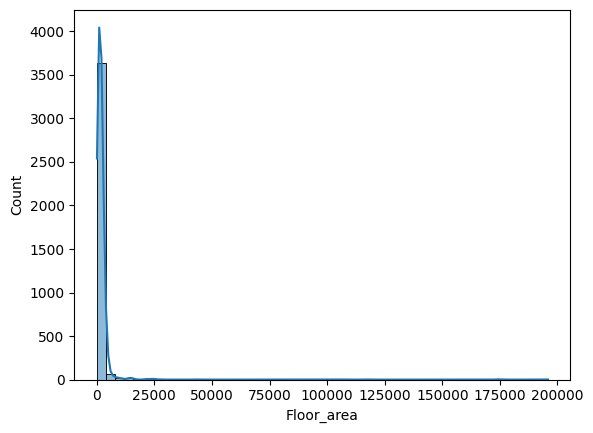

In [11]:
sns.histplot(df['Floor_area'],kde=True,bins=50)
df['Floor_area'].skew()

In [12]:
px.box(df,x='Floor_area',width=1000,height=500)

# City

In [13]:
df['City'].isnull().sum()

np.int64(0)

In [14]:
px.pie(df['City'].value_counts(),values=df['City'].value_counts(),names=df['City'].value_counts().index,hole=0.2,width=600,height=600).show()

# location_area
(1) 37 missing values  
(2) Mirpur has the highest number of flats

In [15]:
df['location_area'].isnull().sum()

np.int64(37)

In [16]:
fig = px.pie(df['location_area'].value_counts().head(10),values=df['location_area'].value_counts().head(10),
             names=df['location_area'].value_counts().head(10).index,hole=0.2,width=600,height=600)
fig.show()

# Price in Cr
(1) Too many outliers

In [17]:
df['Price_in_Cr'].isnull().sum()

np.int64(0)

<Axes: xlabel='Price_in_Cr', ylabel='Count'>

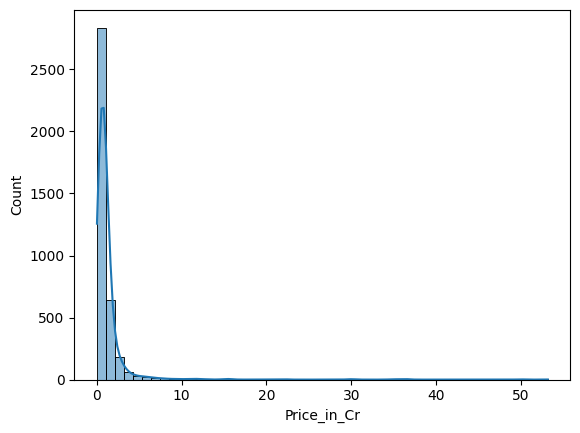

In [18]:
sns.histplot(df['Price_in_Cr'],kde=True,bins=50)

In [19]:
px.box(df,x='Price_in_Cr',width=1000,height=500)

# Is commercial 
(1) Only 11% of the flats are commercial 

In [20]:
df['is_commercial'].isnull().sum()

np.int64(0)

In [21]:
px.pie(df['is_commercial'].value_counts(),values=df['is_commercial'].value_counts(),
names=df['is_commercial'].value_counts().index,hole=0.2,width=600,height=600).show()

# Is Residential 

In [22]:
df['is_residential'].isnull().sum()

np.int64(0)

In [24]:
px.pie(df['is_residential'].value_counts(),values=df['is_residential'].value_counts(),
names=df['is_residential'].value_counts().index,hole=0.2,width=600,height=600).show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('feature_engineered.csv')

# Floor Area

In [4]:
df['Floor_area'].describe()

count      3224.000000
mean       1416.959677
std        2124.519985
min          84.000000
25%        1050.000000
50%        1301.500000
75%        1554.000000
max      108000.000000
Name: Floor_area, dtype: float64

In [5]:
df = df[df['Floor_area'] != 108000.000000]

In [6]:
df = df[~df['Title'].str.contains('land',case=False,na=False)]

In [7]:
df = df[df['Floor_area'] != 14528.0]

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(2443, 14)

In [10]:
px.box(df, x='Floor_area')

np.float64(4.905823672560043)

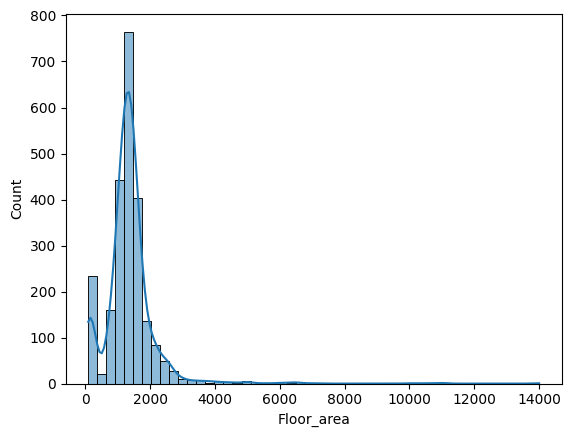

In [11]:
sns.histplot(df['Floor_area'],kde=True,bins=50)
df['Floor_area'].skew()

np.float64(-1.7672037369753892)

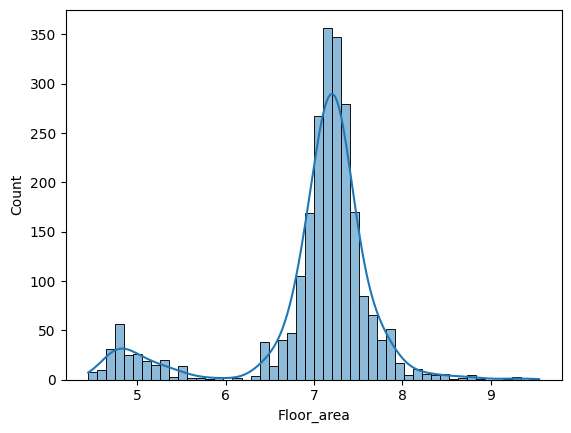

In [12]:
sns.histplot(np.log1p(df['Floor_area']),kde=True,bins=50)
np.log1p(df['Floor_area']).skew()

In [13]:
q1 = df['Floor_area'].quantile(0.25)
q3 = df['Floor_area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)



300.0
2300.0


In [14]:
df[(df['Floor_area'] < lower_bound) | (df['Floor_area'] > upper_bound)].shape

(364, 14)

In [15]:
df[df['Floor_area'] > 3000][['location_area','Price_in_Cr']]

,location_area,Price_in_Cr
21,gulshan,7.80
22,kathalbagan,11.00
127,uttara,3.90
140,bashundhara,5.40
156,uttara,4.50
351,uttara,5.70
425,uttara,4.40
436,bashundhara,3.41
468,dhanmondi,2.90
526,motijheel,5.78


# Price in Cr

In [16]:
df['Price_in_Cr'].describe()

count    2443.000000
mean        1.026521
std         1.554044
min         0.000000
25%         0.500000
50%         0.700000
75%         1.070000
max        35.000000
Name: Price_in_Cr, dtype: float64

In [17]:
px.box(df, x='Price_in_Cr')

In [18]:
df = df[df['Price_in_Cr'] != 0]

In [19]:
df = df[df['Price_in_Cr'] != 0.010000]

In [20]:
df = df[~(df['Price_in_Cr'] < 0.1)]

In [21]:
df[df['Price_in_Cr'] > 15]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Location,location_area,Price_in_Cr,is_commercial,is_residential,Price_per_sqft,floor_level
622,6200 Sq Ft Commercial Space With Quality Fittings Is For Sale In Ibrahimpur,NaN,NaN,3.0,vacant,6200.0,dhaka,"North Ibrahimpur, Ibrahimpur",ibrahimpur,15.50,1.0,0.0,25000.00,low
1410,11003 Square Feet Commercial Space Is Ready For Sale In Bashundhara,NaN,NaN,5.0,vacant,11003.0,dhaka,"Block I, Bashundhara R-A",bashundhara,15.40,1.0,0.0,13996.18,medium
1423,Commercial Area Of 11003 Sq Ft Is Up For Sale At Bashundhara,NaN,NaN,11.0,vacant,11003.0,dhaka,"Block I, Bashundhara R-A",bashundhara,15.40,1.0,0.0,13996.18,high
1487,See This 4686 Sq Ft Vacant Commercial Space Up For Sale In Motijheel Road Near Eastern Bank Limited,NaN,NaN,1.0,vacant,4686.0,dhaka,"Motijheel Road, Motijheel",motijheel,21.09,1.0,0.0,45006.40,low
1739,"14000 Sq Ft A Fully Fitted Elegant Office Is Available For Sale At 28 No. Pathantooly Ward, Double Mooring",NaN,NaN,6.0,vacant,14000.0,chattogram,"28 No. Pathantooly Ward, Double Mooring",double mooring,35.00,1.0,0.0,25000.00,medium
2767,"This 10000 Sq Ft Commercial Space Is Up For Sale At Cda Avenue, East Nasirabad",NaN,NaN,10.0,vacant,10000.0,chattogram,"CDA Avenue, East Nasirabad",east nasirabad,30.00,1.0,0.0,30000.00,high
3240,6500 Square Feet Commercial Space Is Available For Sale In Gazipur Sadar Upazila,NaN,NaN,3.0,vacant,6500.0,gazipur,"Shimultoly, Gazipur Sadar Upazila",gazipur sadar upazila,18.20,1.0,0.0,28000.00,low


In [22]:
df = df[df['is_commercial'] == 0]

In [23]:
df.shape

(2113, 14)

In [24]:
df = df[df['Price_in_Cr'] != 0.13]

In [25]:
df = df[~(df['Price_in_Cr'] > 8)]

# Price_per_sqft

np.float64(2.6395557006007606)

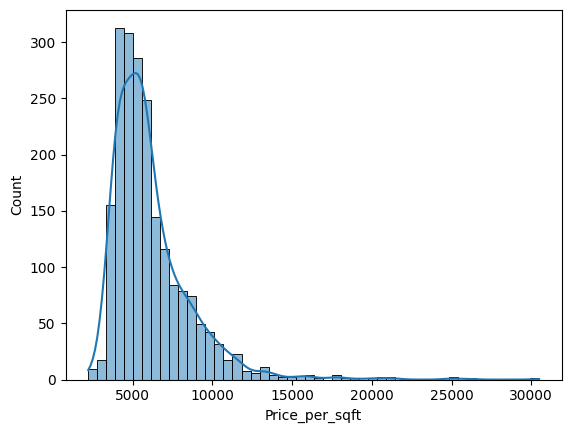

In [26]:
sns.histplot(df['Price_per_sqft'],kde=True,bins=50)
df['Price_per_sqft'].skew()

np.float64(0.7694354984647982)

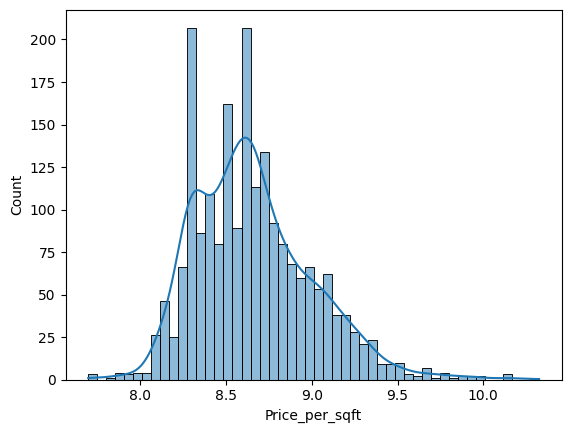

In [27]:
sns.histplot(np.log1p(df['Price_per_sqft']),kde=True,bins=50)
np.log1p(df['Price_per_sqft']).skew()

In [28]:
df['Price_per_sqft'].describe()

count     2054.000000
mean      6130.668939
std       2530.324105
min       2200.000000
25%       4480.690000
50%       5515.150000
75%       6972.817500
max      30496.450000
Name: Price_per_sqft, dtype: float64

In [29]:
px.box(df, x='Price_per_sqft')

In [30]:
df = df[df['Price_per_sqft'] != 30496.45]

In [104]:
# df.loc[3177,'Floor_area'] = 4800
# df.loc[1949,'Bedrooms'] = 3
df.loc[1949,'location_area'] = 'West Sholoshohor Ward'

# df.loc[1530,'Price_per_sqft'] = (0.54*10000000)/1220

In [105]:
df[df.isna().any(axis=1)]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Location,location_area,Price_in_Cr,is_commercial,is_residential,Price_per_sqft,floor_level
609,1254 Sq Ft Flat For Sale In Kalachandpur,3.0,3.0,6.0,vacant,1254.0,dhaka,NaN,kalachandpur,0.83,0.0,1.0,6618.82,medium
700,A Nicely Constructed Apartment Of 1175 Sq Ft Is Available Right Now For Sale In Shiddheswari,3.0,3.0,NaN,vacant,1175.0,dhaka,"Outer Circular Road, Shiddheswari",shiddheswari,1.00,0.0,1.0,8510.64,NaN
918,"950 Sq Ft Flat For Sale In East Rampura, Tv Road",3.0,2.0,NaN,vacant,950.0,dhaka,"East Rampura, Rampura",rampura,0.70,0.0,1.0,7368.42,NaN
1034,A Very Well Fitted 2268 Sq Ft Business Space Is Up For Sale In Dhanmondi,NaN,NaN,4.0,vacant,2268.0,dhaka,"Road No 5, Dhanmondi",dhanmondi,4.70,0.0,1.0,20723.10,medium
1086,"Prominent Location And Splendid Outlook, This Open Floor Is Up For Sale In Mirpur Near To Life Aid Specialized Hospital Pvt. Ltd.",NaN,NaN,2.0,vacant,1700.0,dhaka,"East Monipur, Mirpur",mirpur,1.16,0.0,1.0,6823.53,low
1521,Choose your destination at 1500 SQ FT flat which is available for sale in North Shahjahanpur near to Pubali Bank.,NaN,NaN,NaN,NaN,1500.0,dhaka,"Police Fari road, Khilgaon",khilgaon,1.25,0.0,1.0,8333.33,NaN
1522,"An Apartment Is Ready For Sale At Mohammadpur, Near Dhaka Uddyan Government College.",NaN,NaN,NaN,NaN,NaN,dhaka,"Dhaka Uddan, Mohammadpur",mohammadpur,0.57,0.0,1.0,NaN,NaN
1523,Well-featured 1287 Sq Ft Residence Is Ready For Sale At West Nakhalpara,NaN,NaN,NaN,NaN,1287.0,dhaka,"West Nakhalpara, Tejgaon",tejgaon,0.85,0.0,1.0,6604.51,NaN
1525,A 3 Bedroom Apartment Which Is Up For Sale At Dhanmondi Near To Eastern University.,3.0,NaN,NaN,NaN,NaN,dhaka,"Road No 5, Dhanmondi",dhanmondi,2.93,0.0,1.0,NaN,NaN
1526,A 1255 Sq.Ft Apartment For Sale In Mirpur Near Baitul Rahat Kendrio Jame Masjid,NaN,NaN,NaN,NaN,1255.0,dhaka,"Khilbari Tek, Badda",mirpur,0.50,0.0,1.0,3984.06,NaN


In [102]:
df['Price_per_sqft'] = ((df['Price_in_Cr']*10000000)/df['Floor_area']).round(2)

In [106]:
df.isnull().sum()

Title                0
Bedrooms            56
Bathrooms           59
Floor_no            62
Occupancy_status    56
Floor_area          17
City                 0
Location             1
location_area        0
Price_in_Cr          0
is_commercial        0
is_residential       0
Price_per_sqft      17
floor_level         62
dtype: int64

In [107]:
df.drop(columns=['Floor_no','Occupancy_status','Location','is_commercial','is_residential'],inplace=True)

In [108]:
df.columns

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_area', 'City', 'location_area',
       'Price_in_Cr', 'Price_per_sqft', 'floor_level'],
      dtype='object')

In [109]:
df.to_csv('Outlier & partial missing.csv',index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('Outlier & partial missing.csv')

In [3]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,1960.0,dhaka,gulshan,3.90,19897.96,low
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1705.0,dhaka,kalabagan,1.69,9912.02,low
2,1370 square feet apartment is ready to sale in...,3.0,3.0,1370.0,dhaka,dhanmondi,1.25,9124.09,medium
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,2125.0,dhaka,bashundhara,2.00,9411.76,medium
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,2687.0,dhaka,banani,4.75,17677.71,medium


# Univariate Analysis

# (1) Bedrooms

In [4]:
fig = px.pie(data_frame=df['Bedrooms'].value_counts(),names=df['Bedrooms'].value_counts().index,
       values=df['Bedrooms'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='Bedrooms',title_x=0.5)
fig.show()

Bedroom is not an important column as there is not much of a variety  
78% Houses have 3 bedrooms 

# (2) Bathrooms

In [5]:
fig = px.bar(y=df['Bathrooms'].value_counts(),width=800,height=400)

fig.update_layout(title_text='Bathrooms',title_x=0.5,xaxis_title='Bathrooms',yaxis_title='Count')
fig.show()

In [6]:
fig = px.pie(data_frame=df['Bathrooms'].value_counts(),names=df['Bathrooms'].value_counts().index,
       values=df['Bathrooms'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='Bathrooms',title_x=0.5)
fig.show()

63% of the Houses has 3 Bedrooms 
And the majority belongs to 3,2 & 4

# (3) Floor_area

In [7]:
df['Floor_area'].describe()

count    2092.000000
mean     1419.369981
std       495.730011
min       250.000000
25%      1150.000000
50%      1350.000000
75%      1570.000000
max      6509.000000
Name: Floor_area, dtype: float64

Skewness: 2.7233326516172034
Kurtosis: 16.57475629831312


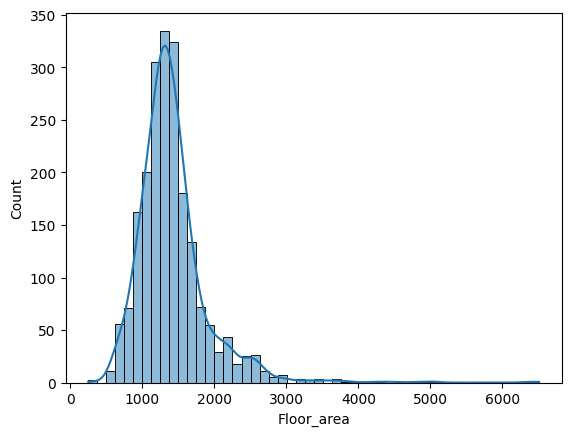

In [8]:
sns.histplot(df['Floor_area'],kde=True,bins=50)
print(f'Skewness: {df["Floor_area"].skew()}')
print(f'Kurtosis: {df["Floor_area"].kurt()}')


Skewness: 0.30008255860689254
Kurtosis: 2.1673603716171166


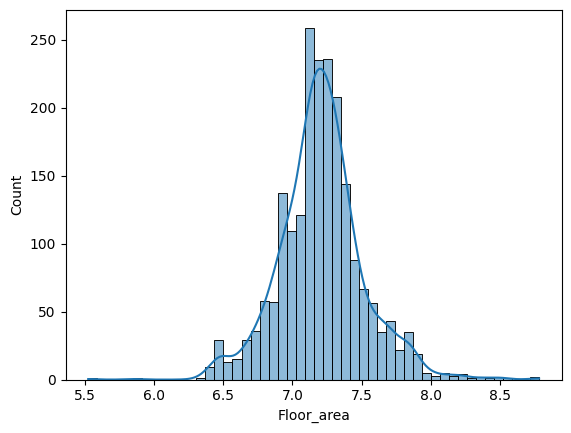

In [9]:
sns.histplot(np.log1p(df['Floor_area']),kde=True,bins=50)
print(f'Skewness: {np.log1p(df["Floor_area"]).skew()}')
print(f'Kurtosis: {np.log1p(df["Floor_area"]).kurt()}')

In [10]:
px.box(df,x='Floor_area',width=800,height=400)

In [11]:
px.box(x=np.log1p(df['Price_in_Cr']),width=800,height=400)

Floor_area is right skewed and the kurtosis value is greater than 3 so even after cleaning the outliers there are some genuine extreme values. 
We can use log transformation to reduce the Skewness here  
The mean value is 1419

 # (4) City

In [12]:
fig = px.pie(data_frame=df['City'].value_counts(),names=df['City'].value_counts().index,
       values=df['City'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='City',title_x=0.5)
fig.show()

 Most of the Houses are Based on Dhaka and Chattogram

# (5) Location Area

In [13]:
df['location_area'].value_counts().head(10)

location_area
mirpur                   397
gazipur sadar upazila    131
bashundhara              111
double mooring           109
bakalia                  106
bayazid                   93
uttara                    73
khulshi                   72
north pahartali ward      66
bagmoniram ward           56
Name: count, dtype: int64

In [14]:
fig = px.bar(x=df['location_area'].value_counts().head(10).index,y=df['location_area'].value_counts().head(10),width=800,height=400)
fig.update_layout(title_text='location_area',title_x=0.5,xaxis_title='location_area',yaxis_title='Count')
fig.show()

Mirpur Has the highest Number of Houses

# (6) Price_in_Cr

In [15]:
df['Price_in_Cr'].describe()

count    2109.000000
mean        0.931859
std         0.741166
min         0.180000
25%         0.530000
50%         0.710000
75%         1.080000
max         7.800000
Name: Price_in_Cr, dtype: float64

Skewness: 3.6700822763304974
Kurtosis: 19.292766563749513


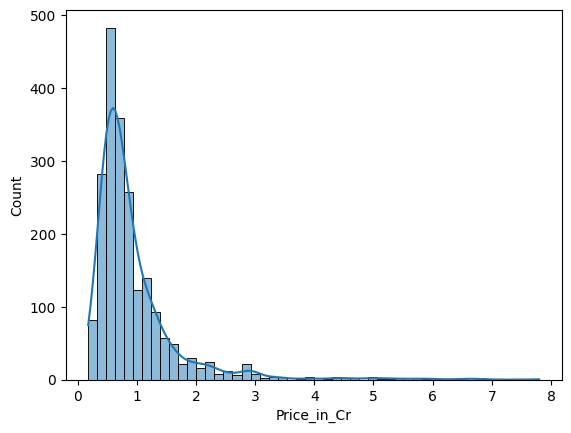

In [16]:
sns.histplot(df['Price_in_Cr'],kde=True,bins=50)
print(f'Skewness: {df["Price_in_Cr"].skew()}')
print(f'Kurtosis: {df["Price_in_Cr"].kurt()}')

Skewness: 1.7792482767994844
Kurtosis: 4.383352143050519


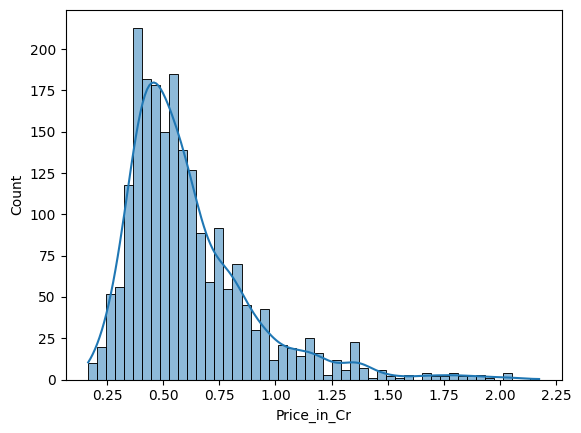

In [17]:
sns.histplot(np.log1p(df['Price_in_Cr']),kde=True,bins=50)
print(f'Skewness: {np.log1p(df["Price_in_Cr"]).skew()}')
print(f'Kurtosis: {np.log1p(df["Price_in_Cr"]).kurt()}')

In [18]:
px.box(x=df['Price_in_Cr'],width=800,height=400)

In [19]:
px.box(x=np.log1p(df['Price_in_Cr']),width=800,height=400)


Same as the Floor Area column , we can use log transformation to redeuce the outliers and skewness  
The Average price is 0.93 Cr

# (7) Price_per_sqft 

Skewness: 2.3551084424685946
Kurtosis: 9.733170080399134


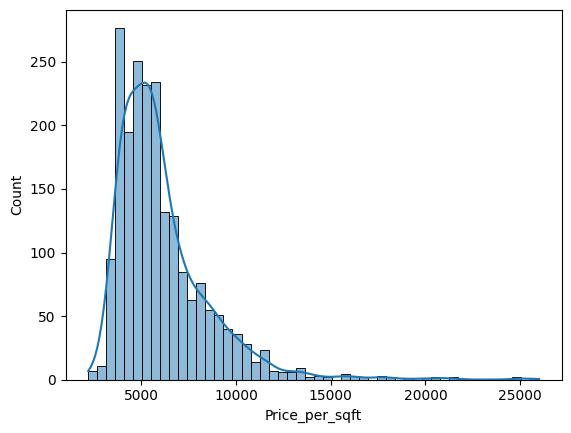

In [20]:
sns.histplot(df['Price_per_sqft'],kde=True,bins=50)
print(f'Skewness: {df['Price_per_sqft'].skew()}')
print(f'Kurtosis: {df['Price_per_sqft'].kurt()}')

Skewness: 0.7353049929090023
Kurtosis: 0.8090572936988001


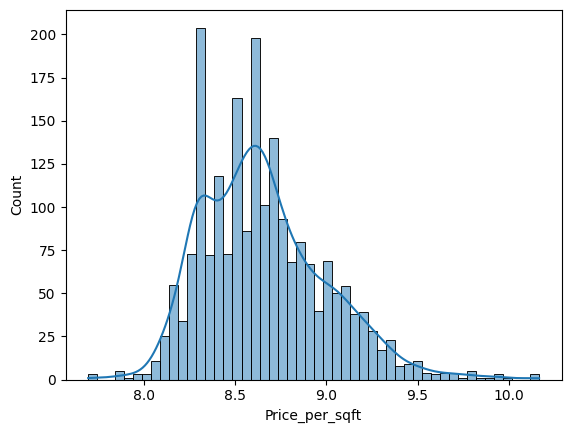

In [21]:
sns.histplot(np.log1p(df['Price_per_sqft']),kde=True,bins=50)
print(f'Skewness: {np.log1p(df['Price_per_sqft']).skew()}')
print(f'Kurtosis: {np.log1p(df['Price_per_sqft']).kurt()}')

In [22]:
px.box(x=df['Price_per_sqft'],width=800,height=400)

In [23]:
px.box(x=np.log1p(df['Price_per_sqft']),width=800,height=400)

Log transformation is needed for converging to normal distribution and outlier removal

# (8) floor_level

In [24]:
fig = px.pie(data_frame=df['floor_level'].value_counts(),names=df['floor_level'].value_counts().index,
             values=df['floor_level'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='floor_level',title_x=0.5)

55% of houses are on medium level 

# Feature Engineering

In [25]:
df['Is_in_Dhaka'] = df['City'].apply(lambda x : 'yes' if x == 'dhaka' else 'no')

In [26]:
fig = px.pie(data_frame=df['Is_in_Dhaka'].value_counts(),names=df['Is_in_Dhaka'].value_counts().index,
             values=df['Is_in_Dhaka'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='Is_in_Dhaka',title_x=0.5)

46% houses are in dhaka 

# Bi & Multivariate Analysis

# (2) Bathrooms , Bedrooms & Price 

In [27]:

fig = px.imshow(pd.crosstab(df['Bedrooms'],df['Bathrooms']),text_auto=True,width=500,height=500,color_continuous_scale='Hot')
fig.update_layout(title_text='Bedrooms vs Bathrooms',title_x=0.5)
fig.show()

The combination of 3 bedrooms and 3 bathrooms are the highest.  
2nd highest combination is 2 bedrooms and 2 bathrooms

In [28]:
fig = px.imshow(pd.pivot_table(df,index='Bedrooms',columns='Bathrooms',values='Price_in_Cr',aggfunc='mean'),
          text_auto=True,width=600,height=600,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs Bathrooms & Price',title_x=0.5)
fig.show()

The Highest Average Price is 4.24 Cr for 6 Bedrooms with 4 Bathrooms  
The Lowest Average Price is 0.2 Cr for 3 Bedrooms with 1 Bathrooms 

# (3) Bedrooms vs City

In [29]:
fig = px.imshow(pd.crosstab(df['City'],df['Bedrooms']),text_auto=True,width=500,height=500,color_continuous_scale='Inferno')
fig.update_layout(title_text='City vs Bedrooms',title_x=0.5)
fig.show()

Chattogram and Dhaka has the highest number houses with 3 Bedrooms with equal number 690 

In [30]:
fig = px.imshow(pd.pivot_table(df,index='City',columns='Bedrooms',values='Price_in_Cr',aggfunc='mean'),
          text_auto=True,width=600,height=600,color_continuous_scale='Inferno')
fig.update_layout(title_text='City vs Bedrooms & Price',title_x=0.5)
fig.show()

Average price of Houses with 5 and 6 Bedrooms are higher in Dhaka.  
The only house with 7 bedrooms has a lower price than 5 & 6 bedrooms , which is also in dhaka! This might be an outlier , so let's remove it 

In [31]:
df = df[~(df['Bedrooms'] == 7)]

In [32]:
df.columns

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_area', 'City', 'location_area',
       'Price_in_Cr', 'Price_per_sqft', 'floor_level', 'Is_in_Dhaka'],
      dtype='object')

# (3) Floor Area

Text(0.5, 1.0, 'Bedrooms vs Floor_area')

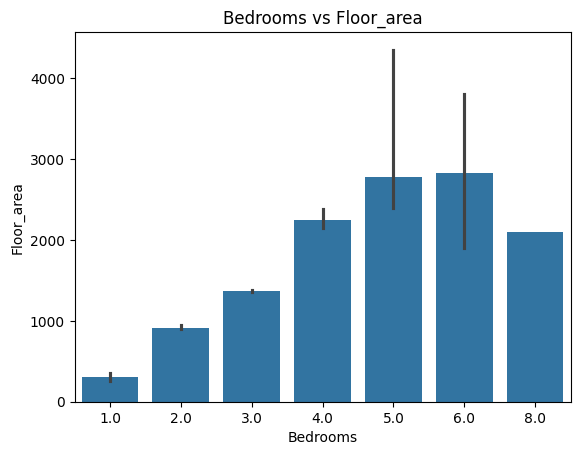

In [33]:
sns.barplot(x=df['Bedrooms'],y=df['Floor_area'],estimator=np.median)
plt.title('Bedrooms vs Floor_area')

In [34]:
df.drop(index=[713,186],inplace=True)

Text(0.5, 1.0, 'Bedrooms vs Floor_area')

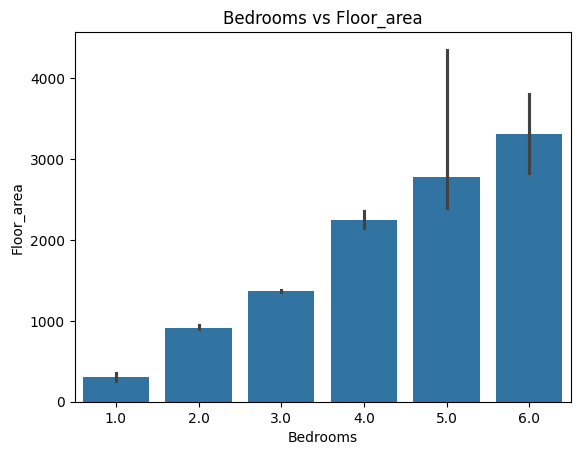

In [35]:
sns.barplot(x=df['Bedrooms'],y=df['Floor_area'],estimator=np.median)
plt.title('Bedrooms vs Floor_area')

Text(0.5, 1.0, 'Bathrooms vs Floor_area')

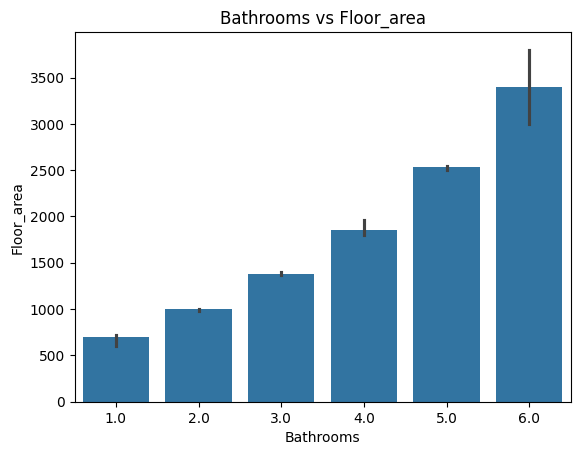

In [36]:
sns.barplot(x=df['Bathrooms'],y=df['Floor_area'],estimator=np.median)
plt.title('Bathrooms vs Floor_area')

Text(0.5, 1.0, 'City vs Floor_area')

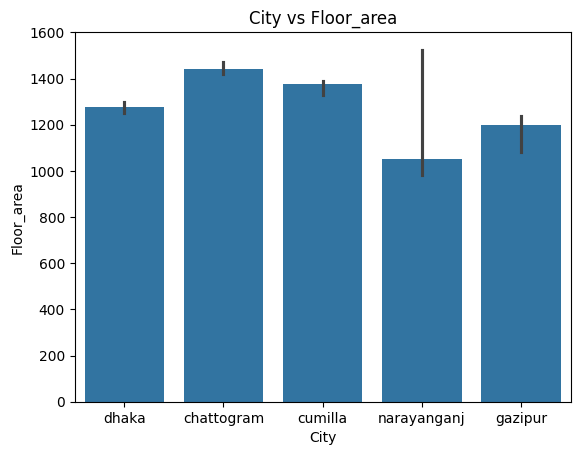

In [37]:
sns.barplot(x=df['City'],y=df['Floor_area'],estimator=np.median)
plt.title('City vs Floor_area')

Chattogram has the highest of Median floor area available  
Narayanganj has the lowest of median floor area available

Text(0.5, 1.0, 'floor_level vs Floor_area')

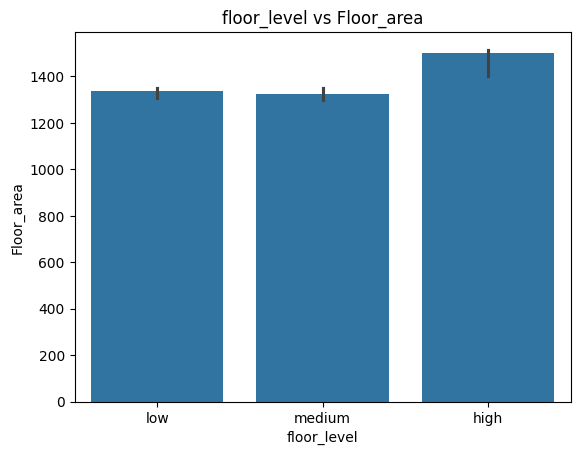

In [38]:
sns.barplot(x=df['floor_level'],y=df['Floor_area'],estimator=np.median)
plt.title('floor_level vs Floor_area')

High Rise Houses has higher median Floor area

In [39]:
fig = px.imshow(pd.crosstab(index=df['Bedrooms'],columns=df['location_area']),
        width=1000,height=500,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs location_area',title_x=0.5)
fig.show()

Mirpur locality has the highest number of houses with 2 & 3 Bedrooms.

(1) Chattogram has the highest number of high rising floors with highest floor_area  
(2) Gazipur has the lowest number of low rising floors with lowest floor_area

In [40]:
fig = px.imshow(pd.crosstab(df['Bedrooms'],df['floor_level']),text_auto=True,width=800,height=400,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs floor_level',title_x=0.5)
fig.show()

Medium Rising floors has the highest number of 3 Bedrooms flat 

In [41]:
fig = px.imshow(pd.pivot_table(data=df,index=df['Bedrooms'],columns=df['floor_level'],values='Price_in_Cr',aggfunc='mean'),
          text_auto=True,width=800,height=400,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs floor_level & Price',title_x=0.5)

Highest mean price is for Medium rising 6 Bedrooms houses  
2nd highest mean price is for High rising 5 Bedrooms houses

# Target Column

Text(0.5, 1.0, 'Bathrooms vs Price')

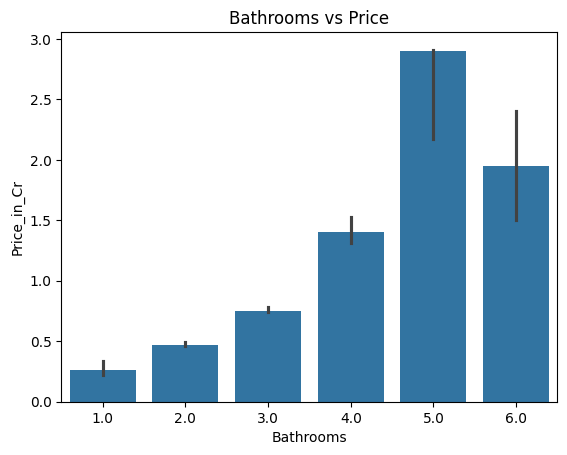

In [42]:
sns.barplot(y=df['Price_in_Cr'],x=df['Bathrooms'],estimator=np.median)
plt.title('Bathrooms vs Price')

Prices were increasing with Bathrooms but suddenly it droped at 6 bathroom , weird.

In [43]:
df[df['Bathrooms'] == 6]

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
1055,3000 Sq Ft Apartment Is Ready For Sale At 18 N...,4.0,6.0,3000.0,chattogram,bakalia,1.5,5000.00,medium,no
1631,3800 Sq Ft Apartment Is Now Ready To Sell In 1...,6.0,6.0,3800.0,chattogram,north kattali ward,2.4,6315.79,low,no


There are lot's of Houses with Bedrooms less than Bathrooms

In [44]:
fig =px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

Prices are increasing with floor_area which is normal  
The relationship is linear

In [45]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],color=df['City'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price vs City',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

Prices are higher in Dhaka in floor_area compare to other region

In [46]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],color=df['floor_level'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price vs floor_level',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

In [47]:
df[((df['floor_level'] == 'high') & (df['Floor_area'] >4000))]

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
103,5040 Sq. Ft Apartment Which Is Up For Sale At ...,4.0,4.0,5040.0,dhaka,bashundhara,5.4,10714.29,high,yes
138,4350 Sq Ft Modern And Spacious Flat For Sale I...,5.0,5.0,4350.0,dhaka,uttara,5.7,13103.45,high,yes
1143,A Nicely Constructed Apartment Of 6509 Sq Ft I...,4.0,5.0,6509.0,chattogram,bagmoniram ward,6.5,9986.17,high,no


The Floor_area values seems like outliers with values greater than 4000 sqft. I don't know what to do with those!  
let's keep them 

In [48]:
df = df[~((df['Is_in_Dhaka'] == 'no') & (df['Floor_area'] > 4000))]

In chattogram bhaghmonirhat , there are 2 flats with extreme high value of Floor_area  
greater than 4500 sqft , let's remove those

In [49]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],color=df['Is_in_Dhaka'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price vs Is_in_Dhaka',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

In [50]:
fig =px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Price_per_sqft vs Price',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

The relationship between Price and Price per sqft is linear which is normal to assume

In [51]:
df = df[~((df['City'].isin(['cumilla'])) & (df['Price_per_sqft'] > 6000))]

Found an outlier value for cumilla with price per sqft is at 10k , which is a business space. Removing that row

In [52]:
df = df[~((df['City'].isin(['gazipur'])) & (df['Price_per_sqft'] > 6000))]

Found an outlier value for gazipur with price per sqft is at 12.5k , which is a warehouse. Removing that row

In [53]:
fig =px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],color=df['City'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Price_per_sqft vs Price vs City',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

In Dhaka , the spread between price and price per sqft is higher  
The spread in chattogram is more stable compare to other region  
cumilla and gazipur have a non linear trend

In [54]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],color=df['floor_level'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text = 'Price_per_sqft vs Price vs floor_level',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

The price vs Price per sqft relation is non-linear for High Rising floors

In [55]:
df[((df['floor_level'].isin(['medium'])) & (df['Price_per_sqft'] > 24000))]

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
752,2700 Square Feet Apartment Is Ready For Sale I...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes
753,2700 Square Feet Great Apartment For Sale In B...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes


In [56]:
df[df['location_area'] == 'banani dohs']

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
228,Notable 2500 Square Feet Apartment For Sale In...,3.0,3.0,2500.0,dhaka,banani dohs,6.50,26000.0,low,yes
752,2700 Square Feet Apartment Is Ready For Sale I...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes
753,2700 Square Feet Great Apartment For Sale In B...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes


In [57]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],color=df['Is_in_Dhaka'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text = 'Price_per_sqft vs Price vs Is_in_Dhaka',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

<Axes: xlabel='City', ylabel='Price_in_Cr'>

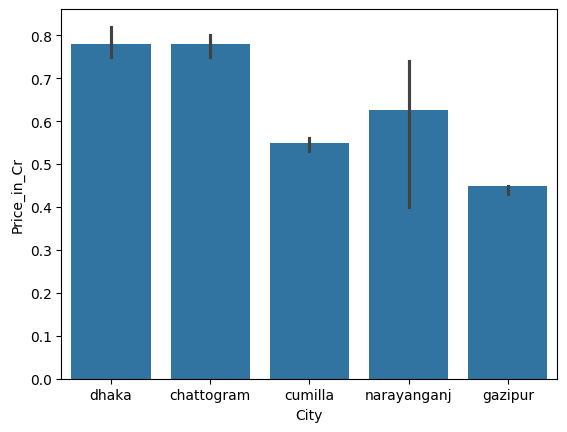

In [58]:
sns.barplot(data=df,y='Price_in_Cr',x='City',estimator=np.median)

Dhaka and Chattogram has simillar median price in Cr around 80 lacs  
Gazipur has the lowest median price in Cr around 40 lacs 

<Axes: xlabel='Is_in_Dhaka', ylabel='Price_in_Cr'>

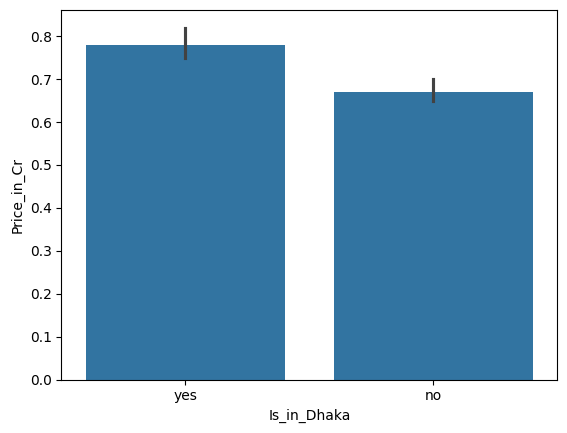

In [59]:
sns.barplot(data=df,y='Price_in_Cr',x='Is_in_Dhaka',estimator=np.median)

Dhaka has higher median price than other region combined



### 🏠 **General Observations**
- **Bedrooms**: Not a strong differentiator — **78%** of houses have **3 bedrooms**, and **63%** have **3 bathrooms**. Most combinations are **3 beds & 3 baths**, followed by **2 beds & 2 baths**.
- **Floors**: Majority of houses are on **2, 3, or 4 floors**.
- **Regions**: Most houses are located in **Dhaka** and **Chattogram**, with **Mirpur** having the highest concentration.



### 📊 **Numerical Features**
#### **Floor Area**
- **Right-skewed** distribution with **kurtosis > 3**, indicating presence of genuine extreme values.
- **Mean floor area**: ~1419 sqft.
- **Log transformation** recommended to reduce skewness and manage outliers.
- **Outliers**:
  - Values > 4000 sqft are potential outliers but retained.
  - **Bhaghmonirhat (Chattogram)** has 2 extreme values > 4500 sqft — removed.

#### **Price**
- **Average price**: ~0.93 Cr.
- **Log transformation** suggested for normalization and outlier handling.
- **Highest average price**: 4.24 Cr for **6 beds & 4 baths**.
- **Lowest average price**: 0.2 Cr for **3 beds & 1 bath**.
- **Price increases with floor area** — **linear relationship**.

#### **Price per Sqft**
- **Highly correlated** with target price.
- **Outliers**:
  - **Cumilla**: 10k/sqft (business space) — removed.
  - **Gazipur**: 12.5k/sqft (warehouse) — removed.
- **Linear relationship** with price overall, but **non-linear** for **high-rise floors**.



### 🏢 **Location-Based Insights**
- **Dhaka & Chattogram**: Highest number of houses with 3 bedrooms (690 each).
- **Dhaka**: Higher median price than other regions combined.
- **Gazipur**: Lowest median price (~40 lacs).
- **Chattogram**: More stable price-per-sqft spread.
- **Cumilla & Gazipur**: Show **non-linear** trends in price vs. price-per-sqft.


### 🏗️ **Building Type Insights**
- **High-rise houses**: Higher median floor area.
- **Medium-rise houses**:
  - Most common for 3-bedroom flats.
  - Highest mean price for 6-bedroom units.
- **Low-rise houses**: Least floor area, especially in Gazipur.


### 🛁 **Bathroom Trends**
- Price generally increases with number of bathrooms, but drops unexpectedly at **6 bathrooms** — possibly an anomaly.
- Some houses have **more bathrooms than bedrooms**, which is unusual.



# Missing_Value_Imputation

In [60]:
df['Bedrooms'].fillna(df['Bedrooms'].median(),inplace=True)

In [61]:
df['Bathrooms'].fillna(df['Bathrooms'].median(),inplace=True) 

In [62]:
df['floor_level'].fillna(df['floor_level'].mode()[0],inplace=True)


In [63]:
df['Floor_area'].fillna(df['Floor_area'].median(),inplace=True)

In [64]:
df['Price_per_sqft'].fillna(df['Price_per_sqft'].median(),inplace=True)

In [66]:
df['Price_in_Cr'].isnull().sum()

np.int64(0)

In [65]:
df.to_csv('final_data.csv',index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df = df.drop(['Title'],axis=1)

# Encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder,TargetEncoder,OrdinalEncoder
df[['City','floor_level','Is_in_Dhaka']] = OrdinalEncoder(handle_unknown='error').fit_transform(df[['City','floor_level','Is_in_Dhaka']])

In [5]:
df[['location_area']] = TargetEncoder().fit_transform(df[['location_area']],df[['Price_in_Cr']])

In [6]:
x = df.drop(['Price_in_Cr'],axis=1)
y = df['Price_in_Cr']

# Scalling

In [7]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)


# (1) Correlation

In [8]:
px.imshow(df.corr(),text_auto=True,width=800,height=600)

In [9]:
fi_df1 = df.corr()['Price_in_Cr'].to_frame().sort_values(by='Price_in_Cr',ascending=False).reset_index().rename({'index':'Features','Price_in_Cr':'Importance'},axis=1)

In [10]:
fi_df1

,Features,Importance
0,Price_in_Cr,1.000000
1,Price_per_sqft,0.877645
2,Floor_area,0.819041
3,location_area,0.736711
4,Bathrooms,0.547007
5,Bedrooms,0.491993
6,Is_in_Dhaka,0.179655
7,City,0.008057
8,floor_level,-0.053174


In [11]:
fi_df1.tail(3)

,Features,Importance
6,Is_in_Dhaka,0.179655
7,City,0.008057
8,floor_level,-0.053174


# (2) Random Forest Feature Importance

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(x_scaled,y)

fi_df2 = pd.DataFrame({'Features':x.columns,'RF_Importance':rf.feature_importances_}).sort_values(by='RF_Importance',ascending=False)
fi_df2

,Features,RF_Importance
5,Price_per_sqft,0.553417
2,Floor_area,0.429360
4,location_area,0.014159
1,Bathrooms,0.001082
6,floor_level,0.000815
0,Bedrooms,0.000474
3,City,0.000450
7,Is_in_Dhaka,0.000242


In [13]:
fi_df2.tail(3)

,Features,RF_Importance
0,Bedrooms,0.000474
3,City,0.000450
7,Is_in_Dhaka,0.000242


# (3) Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100,random_state=0).fit(x_scaled,y)

fi_df3 = pd.DataFrame({'Features':x.columns,'GB_Importance':gb.feature_importances_}).sort_values(by='GB_Importance',ascending=False)
fi_df3

,Features,GB_Importance
5,Price_per_sqft,0.504056
2,Floor_area,0.488555
4,location_area,0.006958
0,Bedrooms,0.000172
3,City,0.000112
1,Bathrooms,0.000078
6,floor_level,0.000045
7,Is_in_Dhaka,0.000023


# (4) Lasso

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(x_scaled,y)

fi_df4 = pd.DataFrame({'Features':x.columns,'lasso_Importance': lasso.coef_}).sort_values(by='lasso_Importance',ascending=False)
fi_df4

,Features,lasso_Importance
5,Price_per_sqft,0.370587
2,Floor_area,0.281456
4,location_area,0.003352
0,Bedrooms,0.000000
3,City,0.000000
1,Bathrooms,0.000000
6,floor_level,-0.000000
7,Is_in_Dhaka,0.000000


# (5) Recursive Feature Elimination
## Backward Subset Selection (mlxtend) 

In [16]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100,random_state=0)
          ,n_features_to_select=x.shape[0]).fit(x_scaled,y)

features = x.columns[rfe.support_]
Importance = rfe.estimator_.feature_importances_

fi_df5 = pd.DataFrame({'Features':features,'RFE_Importance':Importance}).sort_values(by='RFE_Importance',ascending=False)
fi_df5

,Features,RFE_Importance
5,Price_per_sqft,0.553417
2,Floor_area,0.429360
4,location_area,0.014159
1,Bathrooms,0.001082
6,floor_level,0.000815
0,Bedrooms,0.000474
3,City,0.000450
7,Is_in_Dhaka,0.000242


# (6) Permutation Importance

In [17]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

pi = permutation_importance(estimator=rf,X=x_test,y=y_test,scoring='neg_mean_squared_error',n_repeats=10,random_state=0)

fi_df6 = pd.DataFrame({'Features':x.columns,'PI_Importance':pi.importances_mean}).sort_values(by='PI_Importance',ascending=False)
fi_df6

,Features,PI_Importance
5,Price_per_sqft,0.371248
2,Floor_area,0.264243
4,location_area,0.005248
3,City,0.000363
1,Bathrooms,0.000218
0,Bedrooms,-0.000013
6,floor_level,-0.000028
7,Is_in_Dhaka,-0.000120


# (7) Shap values

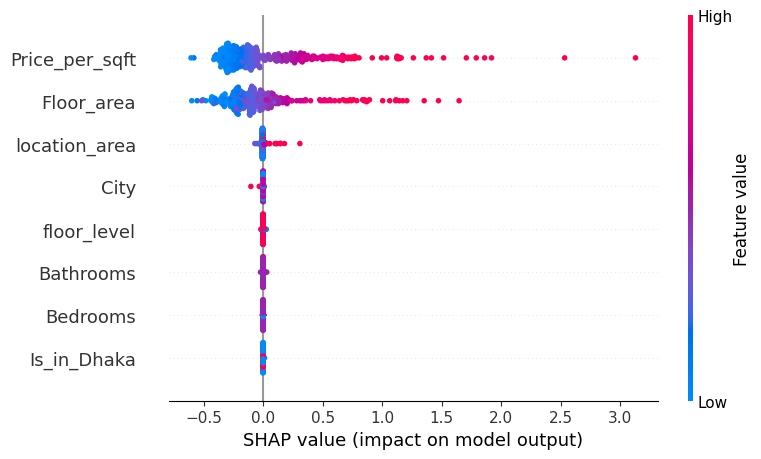

In [20]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer(x_test,check_additivity=False)

shap.summary_plot(shap_values,x_test,feature_names=x.columns)

In [30]:
fi_df7 = pd.DataFrame({'Features':x.columns,'Shap_Importance':np.abs((shap_values.values).mean(axis=0))}).sort_values(by='Shap_Importance',ascending=False)
fi_df7

,Features,Shap_Importance
5,Price_per_sqft,0.036490
2,Floor_area,0.027255
3,City,0.000554
4,location_area,0.000199
1,Bathrooms,0.000185
7,Is_in_Dhaka,0.000060
6,floor_level,0.000044
0,Bedrooms,0.000042


# Merge ALL fi_df

In [39]:
final_df = fi_df1.merge(fi_df2,on='Features').merge(fi_df3,on='Features').merge(fi_df4,on='Features').merge(fi_df5,on='Features').merge(fi_df6,on='Features').merge(fi_df7,on='Features').set_index('Features')

In [40]:
final_df

,Importance,RF_Importance,GB_Importance,lasso_Importance,RFE_Importance,PI_Importance,Shap_Importance
Features,,,,,,,
Price_per_sqft,0.877645,0.553417,0.504056,0.370587,0.553417,0.371248,0.036490
Floor_area,0.819041,0.429360,0.488555,0.281456,0.429360,0.264243,0.027255
location_area,0.736711,0.014159,0.006958,0.003352,0.014159,0.005248,0.000199
Bathrooms,0.547007,0.001082,0.000078,0.000000,0.001082,0.000218,0.000185
Bedrooms,0.491993,0.000474,0.000172,0.000000,0.000474,-0.000013,0.000042
Is_in_Dhaka,0.179655,0.000242,0.000023,0.000000,0.000242,-0.000120,0.000060
City,0.008057,0.000450,0.000112,0.000000,0.000450,0.000363,0.000554
floor_level,-0.053174,0.000815,0.000045,-0.000000,0.000815,-0.000028,0.000044


## Normalization (Dividing each column by it's Column sum)

In [41]:
final_df.divide(final_df.sum(axis=0),axis=1)

,Importance,RF_Importance,GB_Importance,lasso_Importance,RFE_Importance,PI_Importance,Shap_Importance
Features,,,,,,,
Price_per_sqft,0.243322,0.553417,0.504056,0.565440,0.553417,0.579026,0.562864
Floor_area,0.227074,0.429360,0.488555,0.429445,0.429360,0.412133,0.420415
location_area,0.204248,0.014159,0.006958,0.005115,0.014159,0.008185,0.003077
Bathrooms,0.151654,0.001082,0.000078,0.000000,0.001082,0.000340,0.002851
Bedrooms,0.136402,0.000474,0.000172,0.000000,0.000474,-0.000020,0.000642
Is_in_Dhaka,0.049808,0.000242,0.000023,0.000000,0.000242,-0.000187,0.000924
City,0.002234,0.000450,0.000112,0.000000,0.000450,0.000567,0.008551
floor_level,-0.014742,0.000815,0.000045,-0.000000,0.000815,-0.000044,0.000676


In [45]:
final_df.mean(axis=1).sort_values(ascending=False).to_frame('Importance')

,Importance
Features,
Price_per_sqft,0.466694
Floor_area,0.391324
location_area,0.111541
Bathrooms,0.078522
Bedrooms,0.070449
Is_in_Dhaka,0.025729
City,0.001427
floor_level,-0.007355


In [ ]:
from sklearn.model_selection import cross_val_score,KFold

cv_original = cross_val_score(estimator=rf,X=x_scaled,y=y,scoring='neg_mean_squared_error',cv=10)
cv_original.mean()

np.float64(-0.010179995030106071)

In [56]:
cv_after = cross_val_score(estimator=rf,X=x.drop(['Is_in_Dhaka','City','floor_level','Bedrooms','Bathrooms'],axis=1),
                           y=y,scoring='neg_mean_squared_error',cv=10)
cv_after.mean()

np.float64(-0.00986459507404096)

Main Features are Price_per_sqft , Floor_area and location_area,  
After removing other columns the cross validation MSE reached lowest at 0.0098

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [58]:
df = pd.read_csv('final_data.csv')
df = df.drop(['Title','Price_per_sqft','Is_in_Dhaka'],axis=1)
df.head()

,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,floor_level
0,3.0,4.0,1960.0,dhaka,gulshan,3.90,low
1,3.0,3.0,1705.0,dhaka,kalabagan,1.69,low
2,3.0,3.0,1370.0,dhaka,dhanmondi,1.25,medium
3,3.0,3.0,2125.0,dhaka,bashundhara,2.00,medium
4,3.0,3.0,2687.0,dhaka,banani,4.75,medium


Removing the Price_per_sqft column because customers shouldn't have a knowledge about the Price_per_sqft either

In [48]:
x = df.drop(['Price_in_Cr'],axis=1)
y = df['Price_in_Cr']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder,OrdinalEncoder
from category_encoders import TargetEncoder  
from sklearn.linear_model import LinearRegression

In [51]:
transformer = ColumnTransformer([
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
    # ('Target_Encoding',TargetEncoder(),['location_area']),
    ('Scaler',StandardScaler(),['Floor_area'])
],remainder='passthrough')

model_pipe = Pipeline([
    ('preprocessing',transformer),
    ('model',LinearRegression())
])



In [52]:
from sklearn.model_selection import cross_val_score,KFold

cv_original = cross_val_score(estimator=model_pipe,X=x_train,y=y_train,scoring='r2',cv=KFold(n_splits=10,shuffle=True,random_state=0))
cv_original.mean()

np.float64(0.8701043092933576)

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

model_pipe.fit(x_train,y_train)
y_pred = model_pipe.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)

print(f'Mean Squared Error: {MSE}')

print(f'Mean Absolute Error: {MAE}')


Mean Squared Error: 0.07760002237245646
Mean Absolute Error: 0.16690770006811104


In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


model_dict = {
    'linear_reg': LinearRegression(),
    'svr': SVR(),
    'ridge': Ridge(),
    'lasso': Lasso(), 
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost': XGBRegressor(),
    'lightgbm':LGBMRegressor()
}

# (1) Without Feature Transformation

In [60]:
transformer = ColumnTransformer([
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
    # ('Target_Encoding',TargetEncoder(),['location_area']),
    ('Scaler',StandardScaler(),['Floor_area'])
],remainder='passthrough')


def score(model_name,model):

    output = []
    output.append(model_name)

    model_pipe = Pipeline([
        ('preprocessor',transformer),
        ('regressor',model)
    ])

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

    # cv = cross_val_score(model_pipe,x_train,y_train,cv=KFold(n_splits=10,shuffle=True,random_state=0),scoring='r2') 
    # output.append(cv.mean())

    model_pipe.fit(x_train,y_train)
    y_pred = model_pipe.predict(x_test)

    R2 = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)

    output.append(R2)
    output.append(MSE)
    output.append(MAE)

    return output


model_output  = []
for model_name,model in model_dict.items():
    model_output.append(score(model_name,model))

model_output = pd.DataFrame(model_output,columns=['model_name','r2_score','mse','mae']).sort_values(by='mse',ascending=True)
model_output

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1681, number of used features: 33
[LightGBM] [Info] Start training from score 0.919131


,model_name,r2_score,mse,mae
9,mlp,0.889899,0.053944,0.136656
10,xgboost,0.860554,0.068321,0.142653
6,extra_trees,0.859236,0.068967,0.136304
7,gradient_boosting,0.846171,0.075368,0.159702
2,ridge,0.844019,0.076422,0.171600
0,linear_reg,0.841616,0.077600,0.166908
1,svr,0.838414,0.079169,0.149095
5,random_forest,0.806552,0.094779,0.140958
11,lightgbm,0.791573,0.102119,0.165842
4,decision_tree,0.715159,0.139557,0.167137


# (2) With Feature Transformation (Linear Assumptions)

In [59]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.2,random_state=0)


floor_area_pipe = Pipeline([
    ('log_transform',PowerTransformer(method='yeo-johnson')),
    ('scalar',StandardScaler())
])

transformer = ColumnTransformer([
    ("floor_area",floor_area_pipe,['Floor_area']),
    ("log_transform",PowerTransformer(method='yeo-johnson'),['Floor_area']),
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
    # ('Target_Encoding',TargetEncoder(random_state=0),['location_area']),
    # ('Scaler',StandardScaler(),['Floor_area'])
],remainder='passthrough')


def score_transformed(model_name,model):

    output = []
    output.append(model_name)

    model_pipe = Pipeline([
        ('preprocessor',transformer),
        ('regressor',model)
    ])

    final_pipe = TransformedTargetRegressor(regressor=model_pipe,func=np.log1p,inverse_func=np.expm1)


    # cv = cross_val_score(final_pipe,x_train2,y_train2,cv=KFold(n_splits=10,shuffle=True,random_state=0),scoring='r2') 
    # output.append(cv.mean())

    final_pipe.fit(x_train2,y_train2)
    y_pred2 = final_pipe.predict(x_test2)

    R2 = r2_score(y_test2,y_pred2)
    MSE = mean_squared_error(y_test2,y_pred2)
    MAE = mean_absolute_error(y_test2,y_pred2)

    output.append(R2)
    output.append(MSE)
    output.append(MAE)

    return output



model_output_transformed  = []
for model_name,model in model_dict.items():
    model_output_transformed.append(score_transformed(model_name,model))

model_output_transformed = pd.DataFrame(model_output_transformed,
                                        columns=['model_name','r2_score','mse','mae']).sort_values(by='mse',ascending=True)
model_output_transformed

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 1681, number of used features: 34
[LightGBM] [Info] Start training from score 0.607124


,model_name,r2_score,mse,mae
9,mlp,0.890840,0.053483,0.139576
1,svr,0.870947,0.063229,0.155830
10,xgboost,0.866515,0.065401,0.139492
0,linear_reg,0.858094,0.069526,0.158914
2,ridge,0.847247,0.074841,0.161986
6,extra_trees,0.846910,0.075006,0.137463
7,gradient_boosting,0.833376,0.081637,0.157017
11,lightgbm,0.806209,0.094948,0.163231
5,random_forest,0.798523,0.098713,0.140014
8,adaboost,0.717671,0.138327,0.243162


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,TargetEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import optuna
from plotly.io import show
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv('final_data.csv')
df = df.drop(['Title','Price_per_sqft','Is_in_Dhaka'],axis=1)
df.head()

,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,floor_level
0,3.0,4.0,1960.0,dhaka,gulshan,3.90,low
1,3.0,3.0,1705.0,dhaka,kalabagan,1.69,low
2,3.0,3.0,1370.0,dhaka,dhanmondi,1.25,medium
3,3.0,3.0,2125.0,dhaka,bashundhara,2.00,medium
4,3.0,3.0,2687.0,dhaka,banani,4.75,medium


In [5]:
x = df.drop('Price_in_Cr',axis=1)
y = df['Price_in_Cr']

# Optuna

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


floor_area_pipe = Pipeline([
    ('log_transform',PowerTransformer(method='yeo-johnson')),
    ('scalar',StandardScaler())
])

transformer = ColumnTransformer([
    ("floor_area",floor_area_pipe,['Floor_area']),
    ("log_transform",PowerTransformer(method='yeo-johnson'),['Floor_area']),
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
],remainder='passthrough')


def objective(trial,preprocessor):
    regressor_name = trial.suggest_categorical('regressor',['GradientBoostingRegressor'])

    if regressor_name == 'GradientBoostingRegressor':
        n_estimators = trial.suggest_int('model__n_estimators',50,300)
        learning_rate = trial.suggest_float('model__learning_rate',0.05,0.3)
        max_features = trial.suggest_categorical('model__max_features',['sqrt', 'log2'])
        subsample = trial.suggest_float('model__subsample',0.7,1.0)
        max_depth = trial.suggest_int('model__max_depth',3,6)
        min_samples_leaf = trial.suggest_int('model__min_samples_leaf',1,5)
        min_samples_split = trial.suggest_int('model__min_samples_split',2,5)


    model_pipe = Pipeline([
        ('preprocessor',transformer),
        ('model',GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate,max_features=max_features,
                                           max_depth=max_depth,min_samples_leaf=min_samples_leaf,
                                           min_samples_split=min_samples_split,subsample=subsample,random_state=0))
                                           ])

    final_pipe = TransformedTargetRegressor(regressor=model_pipe,func=np.log1p,inverse_func=np.expm1)

    trial.set_user_attr('model',final_pipe)

    cv_score = cross_val_score(final_pipe,x_train,y_train,cv=KFold(n_splits=10,shuffle=True,random_state=0),scoring='neg_mean_squared_error')
    return cv_score.mean()


study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=0),pruner=optuna.pruners.HyperbandPruner())
study.optimize(lambda trial : objective(trial,preprocessor=transformer),n_trials=100,n_jobs=-1)
print(f'Best neg score: {study.best_value}')
print(f'Best Params: {study.best_params}')

final_model = study.best_trial.user_attrs['model']
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

[I 2025-09-26 17:35:59,016] A new study created in memory with name: no-name-17841f17-36de-49e5-8e2c-83fbdffb7243
[I 2025-09-26 17:36:06,824] Trial 2 finished with value: -0.10443517900930888 and parameters: {'regressor': 'GradientBoostingRegressor', 'model__n_estimators': 62, 'model__learning_rate': 0.11538484407003717, 'model__max_features': 'sqrt', 'model__subsample': 0.8296169748742077, 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 3}. Best is trial 2 with value: -0.10443517900930888.
[I 2025-09-26 17:36:08,442] Trial 11 finished with value: -0.07920499876749743 and parameters: {'regressor': 'GradientBoostingRegressor', 'model__n_estimators': 79, 'model__learning_rate': 0.13881757032405923, 'model__max_features': 'sqrt', 'model__subsample': 0.9991018243666185, 'model__max_depth': 6, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}. Best is trial 11 with value: -0.07920499876749743.
[I 2025-09-26 17:36:08,646] Trial 1 finished with valu

Best neg score: -0.06200511376757413
Best Params: {'regressor': 'GradientBoostingRegressor', 'model__n_estimators': 134, 'model__learning_rate': 0.2700045559489739, 'model__max_features': 'sqrt', 'model__subsample': 0.9961388057454358, 'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
MSE: 0.06276607269743066
MAE: 0.14593791828398273
R2: 0.8718923585338596


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,TargetEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import optuna
from plotly.io import show
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [120]:
df = pd.read_csv('final_data.csv')
df = df.drop(['Title','Price_per_sqft','Is_in_Dhaka'],axis=1)
df.head()

,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,floor_level
0,3.0,4.0,1960.0,dhaka,gulshan,3.90,low
1,3.0,3.0,1705.0,dhaka,kalabagan,1.69,low
2,3.0,3.0,1370.0,dhaka,dhanmondi,1.25,medium
3,3.0,3.0,2125.0,dhaka,bashundhara,2.00,medium
4,3.0,3.0,2687.0,dhaka,banani,4.75,medium


In [121]:
x = df.drop('Price_in_Cr',axis=1)
y = df['Price_in_Cr']

# For Tree Dump

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

transformer = ColumnTransformer([
    ("log_transform",PowerTransformer(method='yeo-johnson'),['Floor_area']),
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
    # ('Target_Encoding',TargetEncoder(),['location_area']),
    ('Scaler',StandardScaler(),['Floor_area'])
],remainder='passthrough')

model_pipe = Pipeline([
    ('preprocessing',transformer),
    ('model',XGBRegressor(random_state=0,n_jobs=1,n_estimators=1,gamma=10,min_child_weight=10))
])


# final_pipe = TransformedTargetRegressor(regressor=model_pipe,func=np.log1p,inverse_func=np.expm1)

model = model_pipe.fit(x_train,y_train)
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
MAE= mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f'Base XGboost Model\nMSE:{MSE}\nMAE:{MAE}\nR2:{R2}')


Base XGboost Model
MSE:0.3195075624442113
MAE:0.35638607304339737
R2:0.3478744408203347


In [116]:
tree_dump = model.steps[1][1].get_booster().get_dump(dump_format='text',with_stats=True)

for trees in tree_dump:
    print(trees)

0:[f0<1.38927984] yes=1,no=2,missing=2,gain=410.353607,cover=1681
	1:[f0<0.305330157] yes=3,no=4,missing=4,gain=74.0723877,cover=1542
		3:[f0<-0.373150617] yes=7,no=8,missing=8,gain=16.0938034,cover=1106
			7:leaf=-0.123454757,cover=532
			8:leaf=-0.0509068482,cover=574
		4:[f3<1] yes=9,no=10,missing=10,gain=16.4838543,cover=436
			9:leaf=0.0171754397,cover=284
			10:leaf=0.139396116,cover=152
	2:[f0<2.24198723] yes=5,no=6,missing=6,gain=88.6400146,cover=139
		5:leaf=0.365454674,cover=111
		6:leaf=0.962734401,cover=28



# Optuna

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

floor_area_pipe = Pipeline([
    ('log_transform',PowerTransformer(method='yeo-johnson')),
    ('scalar',StandardScaler())
])

transformer = ColumnTransformer([
    ("floor_area",floor_area_pipe,['Floor_area']),
    ("log_transform",PowerTransformer(method='yeo-johnson'),['Floor_area']),
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
],remainder='passthrough')


def objective(trial,preprocessor):
     regressor_name = trial.suggest_categorical('regressor',['XGBRegressor'])

     if regressor_name == 'XGBRegressor':
        
        gamma = trial.suggest_int('model__gamma',0,0.5)
        reg_lambda = trial.suggest_float('model__reg_lambda',1,2)
        n_estimators = trial.suggest_int('model__n_estimators',50,300)
        learning_rate = trial.suggest_float('model__eta',0.05,0.3)
        min_child_weight = trial.suggest_int('model__min_child_weight',1,3)
        subsample = trial.suggest_float('model__subsample',0.7,1)
        colsample_bytree = trial.suggest_float('model__colsample_bytree',0.7,1)
        max_depth = trial.suggest_int('model__max_depth',3,6)
        tree_method = trial.suggest_categorical('model__tree_method',['hist'])
        max_bin = trial.suggest_int('model__max_bin',64,256)

        model_pipe = Pipeline([
        ('preprocessor',transformer),
        ('model',XGBRegressor(random_state=0,gamma=gamma,reg_lambda=reg_lambda,
                              n_estimators=n_estimators,learning_rate=learning_rate,min_child_weight=min_child_weight,
                              subsample=subsample,colsample_bytree=colsample_bytree,
                              max_depth=max_depth,tree_method=tree_method,max_bin=max_bin))
                              ])
        
        final_pipe = TransformedTargetRegressor(regressor=model_pipe,func=np.log1p,inverse_func=np.expm1)

        trial.set_user_attr('model',final_pipe)

        cv = cross_val_score(final_pipe,x_train,y_train,cv=KFold(n_splits=5,shuffle=True,random_state=0),scoring='neg_mean_squared_error')

        return cv.mean()
     

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=0),pruner=optuna.pruners.HyperbandPruner())
study.optimize(lambda trial: objective(trial,transformer),n_trials=100,n_jobs=-1)

print(f'Best neg score: {study.best_value}')
print(f'Best Params: {study.best_params}')

final_model = study.best_trial.user_attrs['model']
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')


[I 2025-09-26 15:48:20,797] A new study created in memory with name: no-name-2612fd50-5d57-4763-9a69-e090838f813e
[I 2025-09-26 15:48:22,426] Trial 0 finished with value: -0.07824805020647402 and parameters: {'regressor': 'XGBRegressor', 'model__gamma': 0, 'model__reg_lambda': 1.9251412884115324, 'model__n_estimators': 82, 'model__eta': 0.2126780714404331, 'model__min_child_weight': 1, 'model__subsample': 0.8785341790871162, 'model__colsample_bytree': 0.7489058879373668, 'model__max_depth': 3, 'model__tree_method': 'hist', 'model__max_bin': 211}. Best is trial 0 with value: -0.07824805020647402.
[I 2025-09-26 15:48:23,116] Trial 1 finished with value: -0.09468769832601641 and parameters: {'regressor': 'XGBRegressor', 'model__gamma': 0, 'model__reg_lambda': 1.0448176185697824, 'model__n_estimators': 86, 'model__eta': 0.1944400191664346, 'model__min_child_weight': 3, 'model__subsample': 0.9717890117871818, 'model__colsample_bytree': 0.8333299883679455, 'model__max_depth': 6, 'model__tree

Best neg score: -0.06669082139967156
Best Params: {'regressor': 'XGBRegressor', 'model__gamma': 0, 'model__reg_lambda': 1.5081004834272944, 'model__n_estimators': 248, 'model__eta': 0.12489512720368913, 'model__min_child_weight': 1, 'model__subsample': 0.8635394158144538, 'model__colsample_bytree': 0.8880124630656017, 'model__max_depth': 3, 'model__tree_method': 'hist', 'model__max_bin': 245}
MSE: 0.06478102536193789
MAE: 0.14448775030513275
R2: 0.8677797731446115


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,TargetEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import optuna
from plotly.io import show
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('final_data.csv')
df = df.drop(['Title','Price_per_sqft','Is_in_Dhaka'],axis=1)
df.head()

,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,floor_level
0,3.0,4.0,1960.0,dhaka,gulshan,3.90,low
1,3.0,3.0,1705.0,dhaka,kalabagan,1.69,low
2,3.0,3.0,1370.0,dhaka,dhanmondi,1.25,medium
3,3.0,3.0,2125.0,dhaka,bashundhara,2.00,medium
4,3.0,3.0,2687.0,dhaka,banani,4.75,medium


In [3]:
x = df.drop('Price_in_Cr',axis=1)
y = df['Price_in_Cr']

# Optuna 

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

floor_area_pipe = Pipeline([
    ('log_transform',PowerTransformer(method='yeo-johnson')),
    ('scalar',StandardScaler())
])

transformer = ColumnTransformer([
    ("floor_area",floor_area_pipe,['Floor_area']),
    ("log_transform",PowerTransformer(method='yeo-johnson'),['Floor_area']),
    ('Onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['City','Bedrooms','Bathrooms','location_area']),
    ('Ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['floor_level']),
],remainder='passthrough')


def objective(trial,preprocessor):
     regressor_name = trial.suggest_categorical('regressor',['SVR'])

     if regressor_name == 'SVR':
        kernel = trial.suggest_categorical('model__kernel',['rbf','linear','poly','sigmoid'])
        C = trial.suggest_float('model__C',0.01,1000)
        epsilon = trial.suggest_float('model__epsilon', 0.01,1)
        gamma = trial.suggest_categorical('model__gamma', ['scale', 'auto'])

        if kernel == 'poly':
            degree = trial.suggest_int('model__degree',2,5)
            coef0 = trial.suggest_float('model__coef0',0.01,1)
        elif kernel == 'sigmoid':
            coef0 = trial.suggest_float('model__coef0',0.01,1)
        else:
            degree = 3
            coef0 = 0.0


        model_pipe = Pipeline([
            ('preprocessing',transformer),
            ('model',SVR(kernel=kernel,C=C,epsilon=epsilon,gamma=gamma,degree=degree if kernel == 'poly' else 3,coef0=coef0))
        ])

                              
        final_pipe = TransformedTargetRegressor(regressor=model_pipe,func=np.log1p,inverse_func=np.expm1)

        trial.set_user_attr('model',final_pipe)

        cv = cross_val_score(final_pipe,x_train,y_train,cv=KFold(n_splits=5,shuffle=True,random_state=0),scoring='neg_mean_squared_error')

        return cv.mean()
     

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=0),pruner=optuna.pruners.HyperbandPruner())
study.optimize(lambda trial: objective(trial,transformer),n_trials=100,n_jobs=-1)

print(f'Best neg score: {study.best_value}')
print(f'Best Params: {study.best_params}')

final_model = study.best_trial.user_attrs['model']
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

[I 2025-09-26 18:20:01,043] A new study created in memory with name: no-name-f0818eec-30af-4174-bbca-a16b0a613dd3
[I 2025-09-26 18:20:02,406] Trial 0 finished with value: -1.1007230935011303 and parameters: {'regressor': 'SVR', 'model__kernel': 'linear', 'model__C': 853.1861740602301, 'model__epsilon': 0.78251768688683, 'model__gamma': 'auto'}. Best is trial 0 with value: -1.1007230935011303.
[I 2025-09-26 18:20:02,446] Trial 10 finished with value: -1.4642348333020827 and parameters: {'regressor': 'SVR', 'model__kernel': 'sigmoid', 'model__C': 42.63500851438657, 'model__epsilon': 0.8381913989287384, 'model__gamma': 'auto', 'model__coef0': 0.6307895734220429}. Best is trial 0 with value: -1.1007230935011303.
[I 2025-09-26 18:20:02,459] Trial 2 finished with value: -0.6255638475226657 and parameters: {'regressor': 'SVR', 'model__kernel': 'rbf', 'model__C': 187.37898164776, 'model__epsilon': 0.6717882881948473, 'model__gamma': 'auto'}. Best is trial 2 with value: -0.6255638475226657.
[I 

Best neg score: -0.062694331212951
Best Params: {'regressor': 'SVR', 'model__kernel': 'poly', 'model__C': 655.8335042440599, 'model__epsilon': 0.06403339452008569, 'model__gamma': 'auto', 'model__degree': 2, 'model__coef0': 0.452473706007096}
MSE: 0.05293977750345322
MAE: 0.14167954072518918
R2: 0.8919481537676762


In [5]:
final_model

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessing',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('floor_area',
                                                                                       Pipeline(steps=[('log_transform',
                                                                                                        PowerTransformer()),
                                                                                                       ('scalar',
                                                                                                        StandardScaler())]),
                                                                                       ['Floor_area']),
                                                                                      ('log_transform',
                                                                                       PowerTransformer(),
                                                                                       ['Floor_area']),
                                                                                      ('Onehot',
                                                                                       OneHotEncoder(handle_unknown='ignore',
                                                                                                     sparse_output=False),
                                                                                       ['City',
                                                                                        'Bedrooms',
                                                                                        'Bathrooms',
                                                                                        'location_area']),
                                                                                      ('Ordinal',
                                                                                       OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                      unknown_value=-1),
                                                                                       ['floor_level'])])),
                                                     ('model',
                                                      SVR(C=541.2845739355269,
                                                          epsilon=0.12932103217094165,
                                                          gamma='auto',
                                                          kernel='linear'))]))

In [9]:
import pickle

with open('SVR_model.pkl','wb') as f:
    pickle.dump(final_model,f)

In [ ]:
!nbmerge \
"(1) Data_ Gathering.ipynb" \
"(2) Data_Cleaning.ipynb" \
"(3) Feature_Engineering.ipynb" \
"(4) EDA-1.ipynb" \
"(5) Outliers.ipynb" \
"(6) EDA-2 & Missing_Imputations.ipynb" \
"(7) Feature Selection.ipynb" \
"(8) Model Selection.ipynb" \
"(9) Gradient_Boosting.ipynb" \
"(10) XGboost.ipynb" \
"(11) SVR.ipynb" \
> Final.ipynb

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Scripts\nbmerge.exe\__main__.py", line 6, in <module>
    sys.exit(main())
             ~~~~^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\nbmerge\__init__.py", line 189, in main
    plan = parse_plan(args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\nbmerge\__init__.py", line 173, in parse_plan
    raise IOError("Notebook `{}` does not exist".format(file_path))
OSError: Notebook `(1)` does not exist
'Missing_Imputations.ipynb' is not recognized as an internal or external command,
operable program or batch file.
